<a href="https://colab.research.google.com/github/smonto43/UTS_MDSI/blob/main/36106MLAA/Assigment1/MLAA_Notebook_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment Notebook**



## Context


### 0. Import Packages

In [56]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
import scipy.stats as stats

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler

from sklearn.linear_model import LinearRegression


import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### 1.   Load Dataset

Training data

In [58]:
file_url = 'https://drive.google.com/uc?export=download&id=1-IlfTscbeco2Mxn6e_Hu5yAP9qhckSJH'
df_train = pd.read_csv(file_url)
df_train.head(2)

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,604399,f,1990-10-22,87.8,2009,84.0,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.1459,0.2889,445000
1,988334,m,1990-05-15,57.0,2010,64.5,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.5262,-0.2859,110000


Vaidation data

In [59]:
file_url_val = 'https://drive.google.com/uc?export=download&id=1_y3VAvfu58ebeAByXY5JaV1_k3pXAZtJ'
df_val = pd.read_csv(file_url_val)
df_val.head(2)

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,1049856,m,1992-11-08,80.00,2010,85.6,14382,2,B.Tech/B.E.,information technology,90.1,14382,1,2014,490,555,465,0.996744,615,-1,623,-1,-1,-1,-1,-0.0154,0.5454,0.3174,-1.3753,-0.2859,355000
1,445828,m,1992-03-25,78.93,2009,70.8,13210,2,B.Tech/B.E.,electronics and communication engineering,65.0,13210,0,2013,385,375,575,0.824666,395,400,-1,-1,-1,366,-1,-0.5719,0.5008,-0.6343,0.4148,-0.1690,240000


testing data

In [60]:
file_url_test = 'https://drive.google.com/uc?export=download&id=1-GviBcJoaYHdwCjXvsg2zMdOAGiPsNb7'
df_test = pd.read_csv(file_url_test)
df_test.head(2)

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,1066913,m,1993-05-03,75.0,2010,60.40,13599,2,B.Tech/B.E.,electrical engineering,72.0,13599,1,2014,350,445,510,0.557390,-1,324,-1,-1,420,-1,-1,-0.5116,-1.6191,-0.7585,-0.1076,-0.2511,120000
1,1258784,m,1993-01-20,97.0,2010,95.08,566,2,B.Tech/B.E.,electronics and communication engineering,89.0,566,0,2014,440,395,545,0.493596,355,324,-1,-1,-1,-1,-1,1.4208,0.7119,-0.7585,-1.6289,-0.8608,200000


### 2. Explore Dataset

In [61]:
df = df_train.copy(deep=True)

In [62]:
df.isnull().sum()

id                       0
gender                   0
dob                      0
10percentage             0
12graduation             0
12percentage             0
collegeid                0
collegetier              0
degree                   0
specialization           0
collegegpa               0
collegecityid            0
collegecitytier          0
graduationyear           0
english                  0
logical                  0
quant                    0
domain                   0
computerprogramming      0
electronicsandsemicon    0
computerscience          0
mechanicalengg           0
electricalengg           0
telecomengg              0
civilengg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
salary                   0
dtype: int64

calculate the age of each person

In [63]:
df['dob'] = pd.to_datetime(df['dob'])

# Calcular la edad y asignarla a una nueva columna llamada 'age'
df['age'] = df['dob'].apply(lambda x: datetime.datetime.now().year - x.year - ((datetime.datetime.now().month, datetime.datetime.now().day) < (x.month, x.day)))


In [64]:
df[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']] = df[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']].astype(str)


In [65]:

df.dtypes


id                               object
gender                           object
dob                      datetime64[ns]
10percentage                    float64
12graduation                      int64
12percentage                    float64
collegeid                        object
collegetier                      object
degree                           object
specialization                   object
collegegpa                      float64
collegecityid                    object
collegecitytier                  object
graduationyear                    int64
english                           int64
logical                           int64
quant                             int64
domain                          float64
computerprogramming               int64
electronicsandsemicon             int64
computerscience                   int64
mechanicalengg                    int64
electricalengg                    int64
telecomengg                       int64
civilengg                         int64


In [66]:
df.describe(include='all')

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary,age
count,2998,2998,2998,2998.000000,2998.000000,2998.000000,2998,2998,2998,2998,2998.000000,2998,2998,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03,2998.000000
unique,2998,2,NaN,NaN,NaN,NaN,1173,2,4,42,NaN,1173,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,604399,m,NaN,NaN,NaN,NaN,272,2,B.Tech/B.E.,electronics and communication engineering,NaN,272,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2282,NaN,NaN,NaN,NaN,67,2772,2757,670,NaN,67,2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1990-12-06 14:02:00.080053376,77.666264,2008.080720,74.341061,NaN,NaN,NaN,NaN,71.509857,NaN,NaN,2011.939960,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,94.147098,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05,32.787525
min,NaN,NaN,1981-05-06 00:00:00,43.000000,1998.000000,40.000000,NaN,NaN,NaN,NaN,6.630000,NaN,NaN,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04,26.000000
25%,NaN,NaN,1989-11-11 06:00:00,71.140000,2007.000000,66.000000,NaN,NaN,NaN,NaN,66.530000,NaN,NaN,2012.000000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05,32.000000
50%,NaN,NaN,1991-03-05 00:00:00,78.965000,2008.000000,74.000000,NaN,NaN,NaN,NaN,71.800000,NaN,NaN,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05,33.000000
75%,NaN,NaN,1992-03-09 18:00:00,85.600000,2009.000000,82.600000,NaN,NaN,NaN,NaN,76.300000,NaN,NaN,2014.000000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05,34.000000
max,NaN,NaN,1997-05-27 00:00:00,97.760000,2012.000000,98.700000,NaN,NaN,NaN,NaN,99.930000,NaN,NaN,2017.000000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,715.000000,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06,42.000000


numerical data distribution

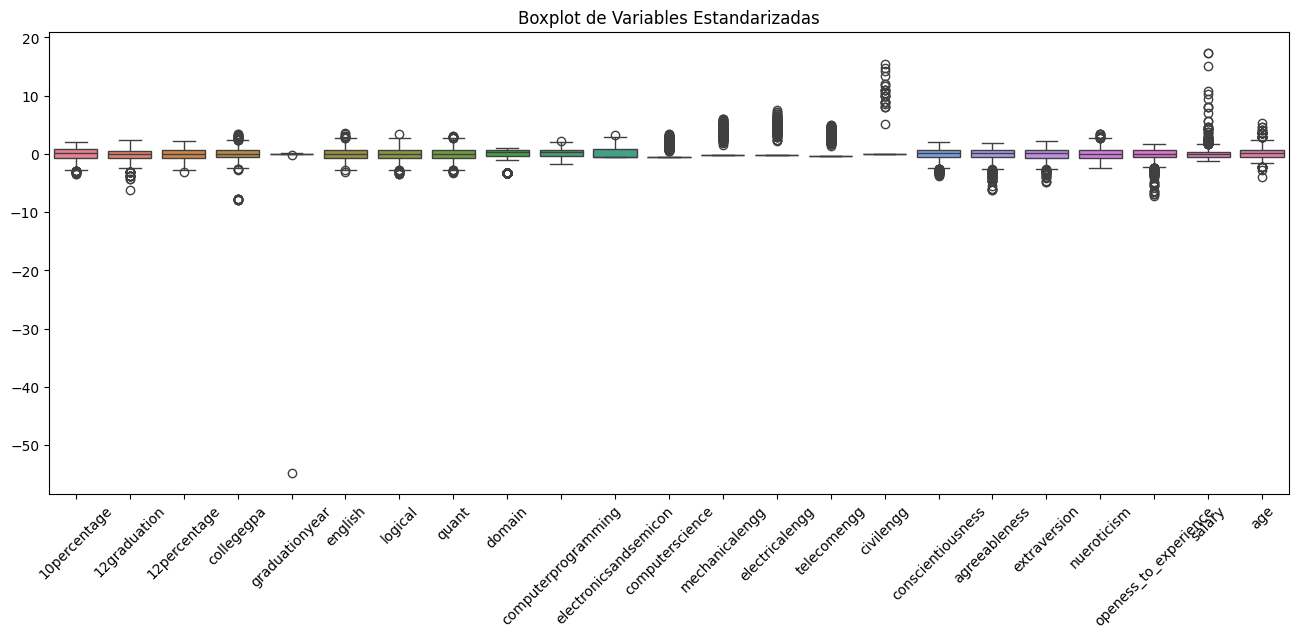

In [67]:
from sklearn.preprocessing import StandardScaler

df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Gráfico de caja para todas las columnas estandarizadas
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=45)
plt.title('Boxplot de Variables Estandarizadas')
plt.show()


<Figure size 1000x600 with 0 Axes>

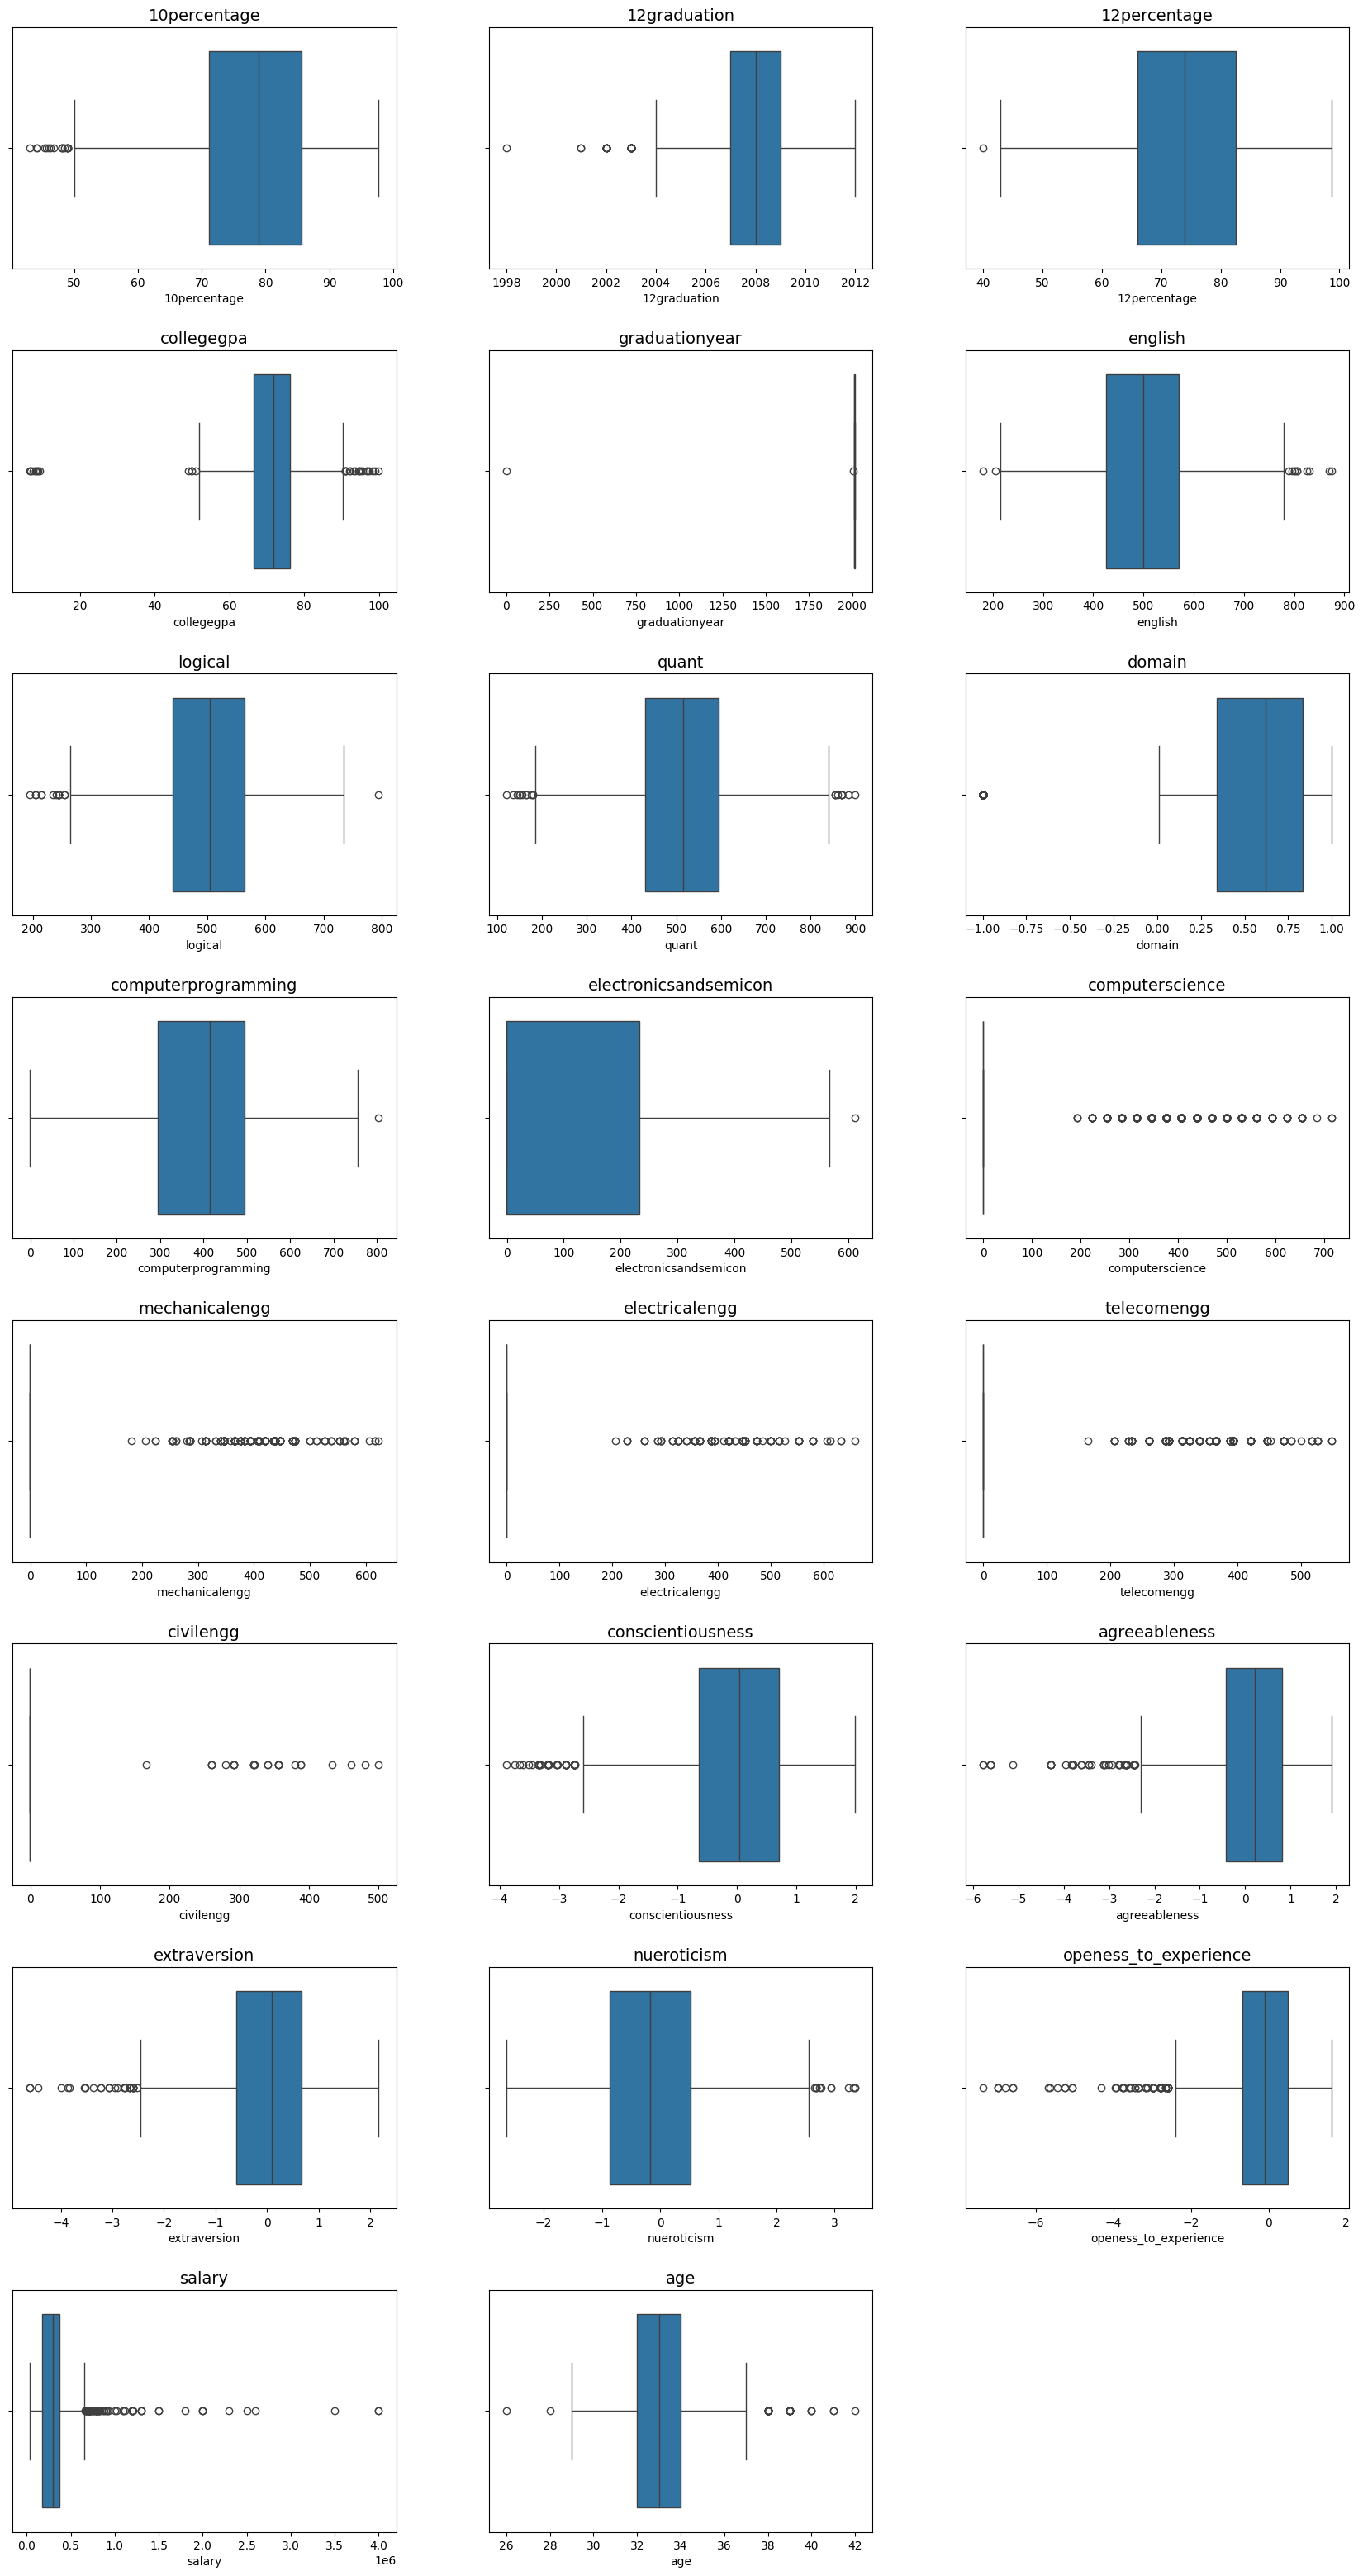

In [68]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Configuración de visualización para mejorar la legibilidad
plt.figure(figsize=(10, 6))

# Número de filas/columnas para el subplot
n_rows = len(df_numeric.columns) // 3 + (len(df_numeric.columns) % 3 > 0)
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
fig.tight_layout(pad=5.0)

for i, col in enumerate(df_numeric.columns):
    row = i // n_cols
    col_idx = i % n_cols
    sns.boxplot(x=df_numeric[col], ax=axs[row, col_idx])
    axs[row, col_idx].set_title(col, fontsize=14)

# Ocultar gráficos vacíos si los hay
for j in range(i+1, n_rows*n_cols):
    axs[j // n_cols, j % n_cols].set_visible(False)

plt.show()

notes after the boxplots and the statistic descrive:
* `graduation year` have a 0 value needs to be removed
*  `collegegpa` seems to have some really low values, below 20. Further inspection needed
* `domain` had on -1 value, need to be removed
* `computerprogramming`,	`electronicsandsemicon`,	`computerscience`,	`mechanicalengg`,	`electricalengg`,	`telecomengg` and `civilengg` columns need further exploration about the -1 one values and without those values.

Column inspection by the distribution

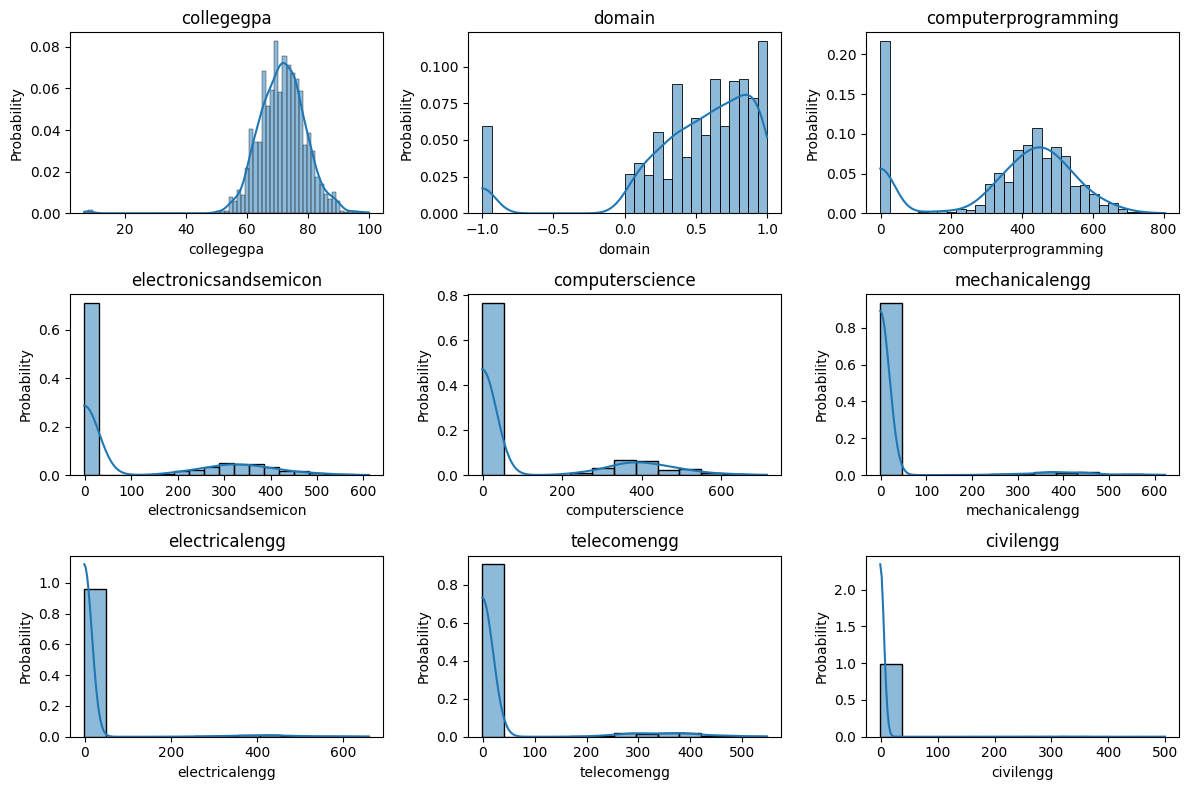

In [69]:
cols_to_plot = [
    'collegegpa','domain','computerprogramming', 'electronicsandsemicon', 'computerscience',
    'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg'
]


# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)  # Ajusta los números aquí según el número de gráficos. Aquí se asume una disposición de 3x3.
    # Filtrar los valores -1 antes de graficar
    sns.histplot(df[col], kde=True, stat='probability')  # kde=True agrega una estimación de densidad kernel
    plt.title(col)

plt.tight_layout()
plt.show()

In [70]:
cols_to_plot = [
    'computerprogramming', 'electronicsandsemicon', 'computerscience',
    'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg'
]
for i in cols_to_plot:
  value = len(df[i][df[i] == -1]) / len(df[i])
  print(f'For the col {i}, {round(value*100,2)}% of the data are -1')


For the col computerprogramming, 21.68% of the data are -1
For the col electronicsandsemicon, 71.15% of the data are -1
For the col computerscience, 76.65% of the data are -1
For the col mechanicalengg, 93.76% of the data are -1
For the col electricalengg, 95.93% of the data are -1
For the col telecomengg, 90.86% of the data are -1
For the col civilengg, 99.13% of the data are -1


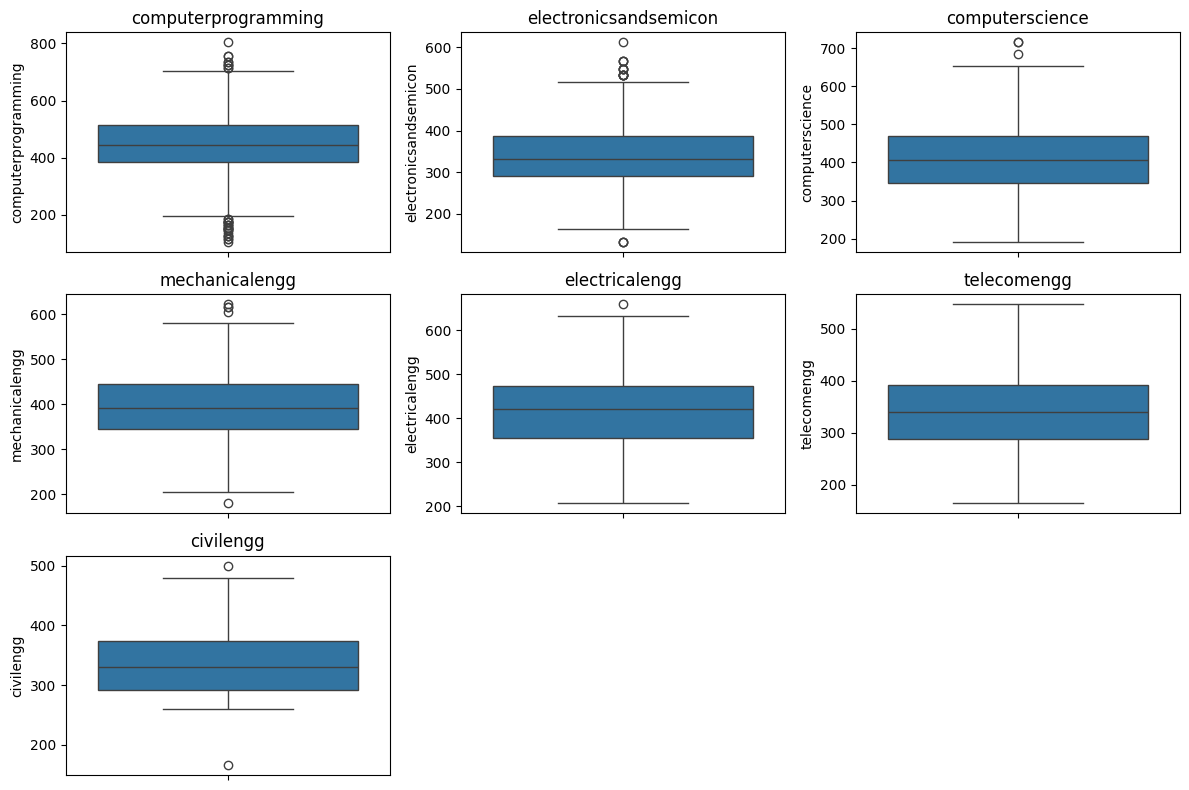

In [71]:

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 8))

# Iterar a través de la lista de columnas para generar los boxplots
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)  # Ajusta los números aquí según el número de gráficos. Aquí se asume una disposición de 3x3.
    # Filtrar los valores -1 antes de graficar
    sns.boxplot(y=df[df[col] != -1][col])
    plt.title(col)

plt.tight_layout()
plt.show()

notes:

* `civilengg` has to many -1, consider to drop it, same for the `electricalengg` and the `mechanicalengg` column

numercial columns cleaning

In [72]:
df = df[(df['graduationyear'] != 0) & (df['collegegpa'] >= 20) & (df['domain'] != -1)]


correlation map between numerical variables

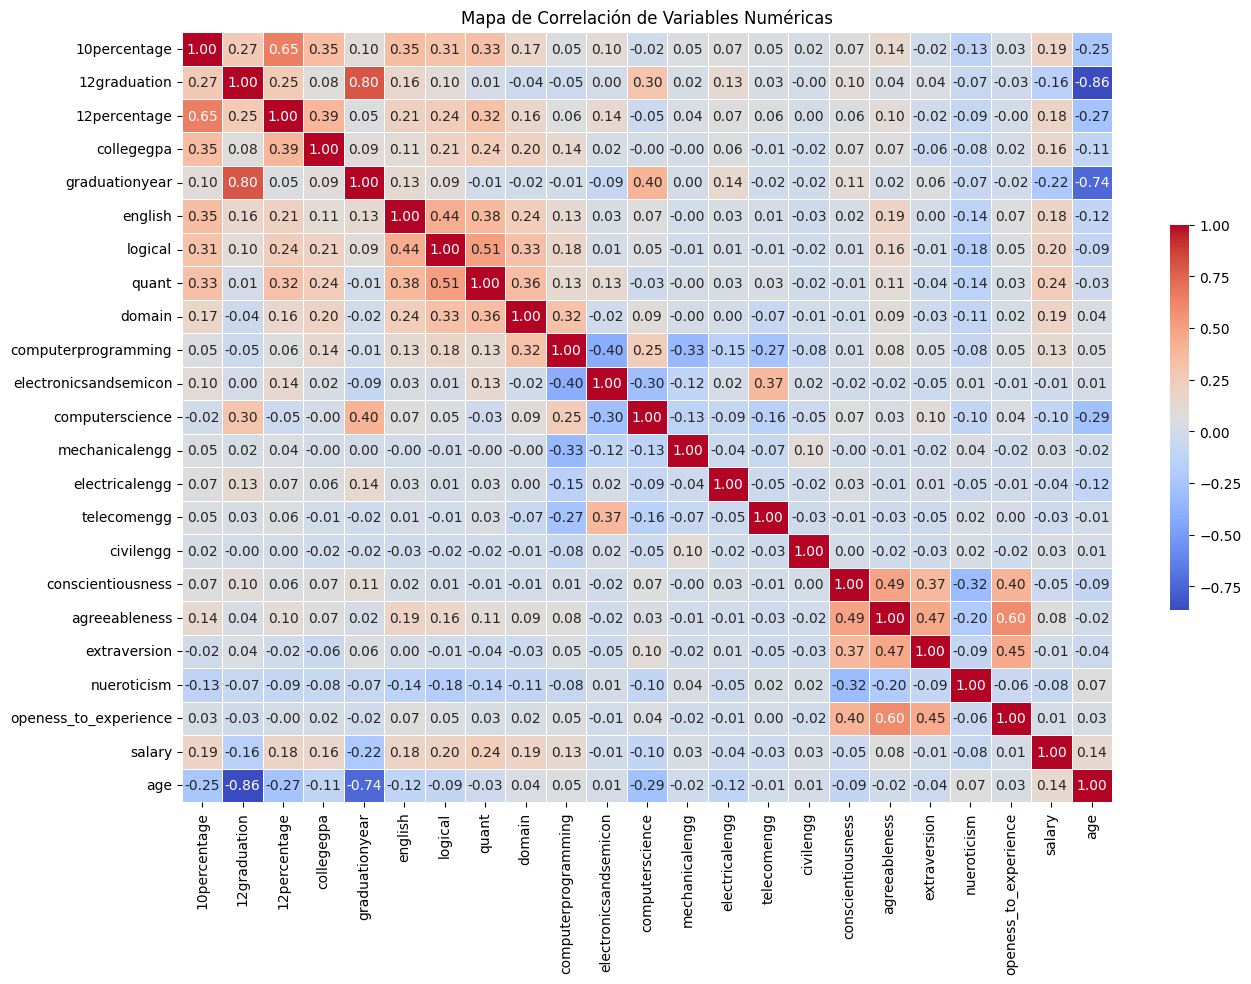

In [73]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()

droped columns due correlation:

1) `12graduation`, `graduationyear` are correlated with `age`

2) `10percentage` is correlated with `12peercentage`

3)

categorical variables distribution

In [74]:
df[df['specialization'].str.contains('&|and', na=False)]['specialization'].unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications',
       'electronics and communication engineering',
       'computer science and technology',
       'electronics and electrical engineering',
       'electronics & instrumentation eng',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation',
       'electronics and computer engineering',
       'mechanical and automation', 'industrial & management engineering',
       'industrial & production engineering',
       'information & communication technology'], dtype=object)

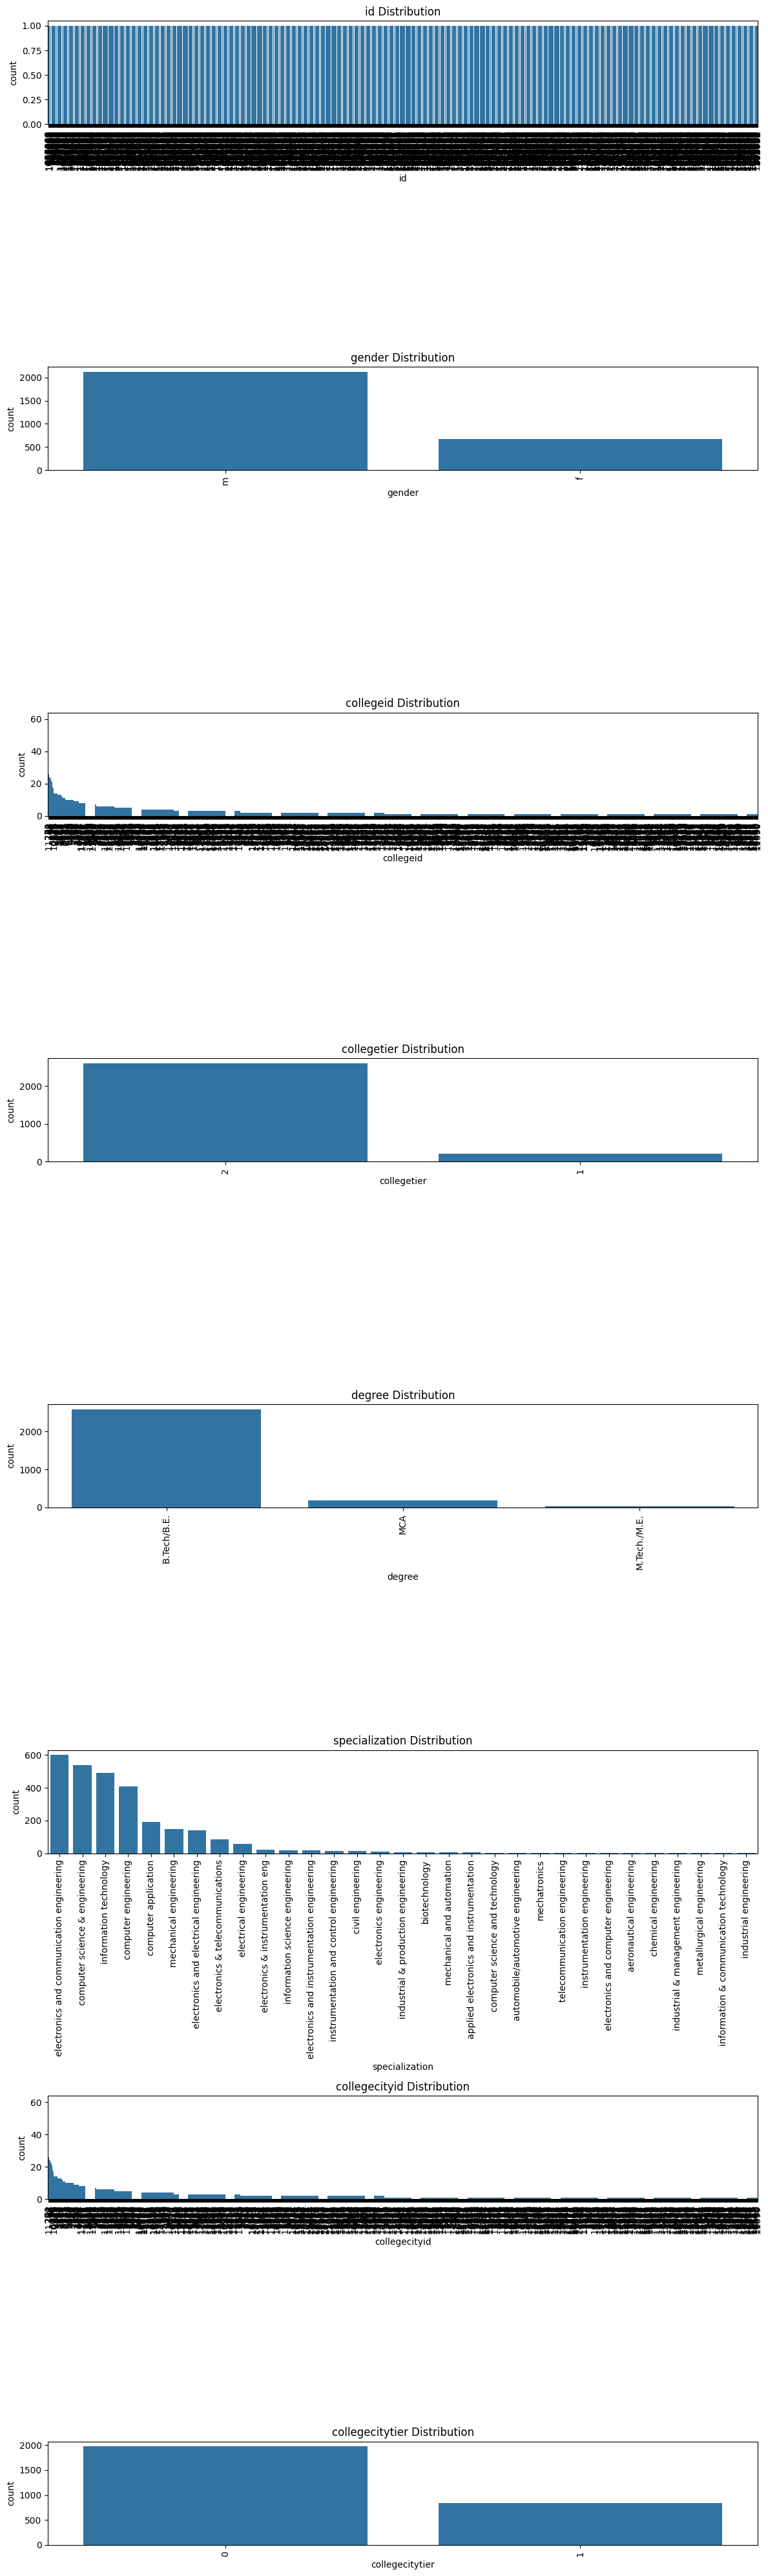

In [75]:
df_categorical = df.select_dtypes(include=['object', 'category'])

plt.figure(figsize=(12, 5 * len(df_categorical.columns)))

for i, col in enumerate(df_categorical.columns, 1):
    plt.subplot(len(df_categorical.columns), 1, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



college id and collegecityid have to many unique values

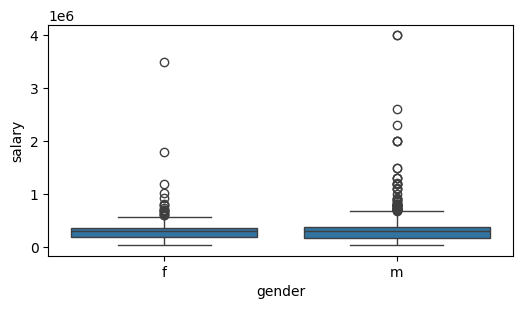

In [76]:
plt.figure(figsize=(6, 3))

sns.boxplot(x='gender', y='salary', data=df)


plt.show()

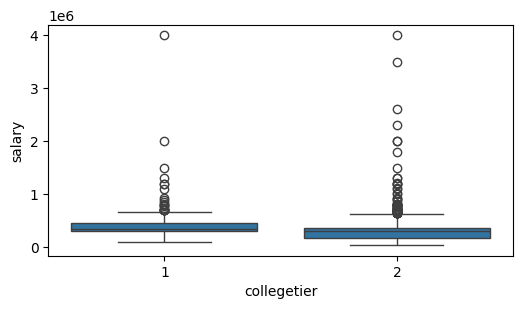

In [77]:
plt.figure(figsize=(6, 3))

sns.boxplot(x='collegetier', y='salary', data=df)

plt.show()

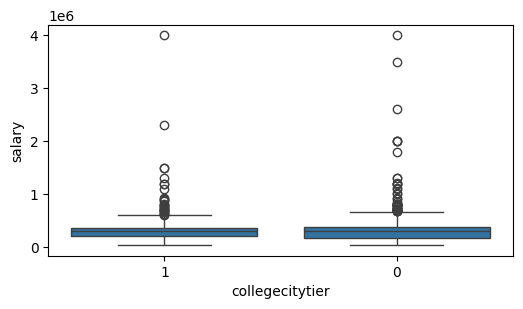

In [78]:
plt.figure(figsize=(6, 3))

sns.boxplot(x='collegecitytier', y='salary', data=df)

plt.show()

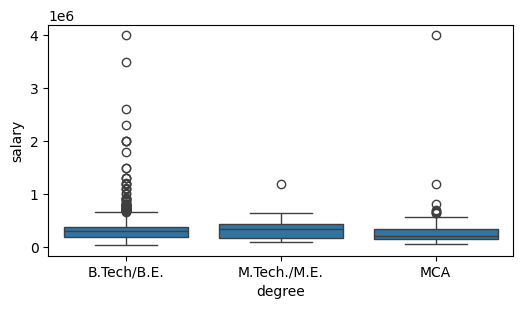

In [79]:
plt.figure(figsize=(6, 3))

sns.boxplot(x='degree', y='salary', data=df)


plt.show()

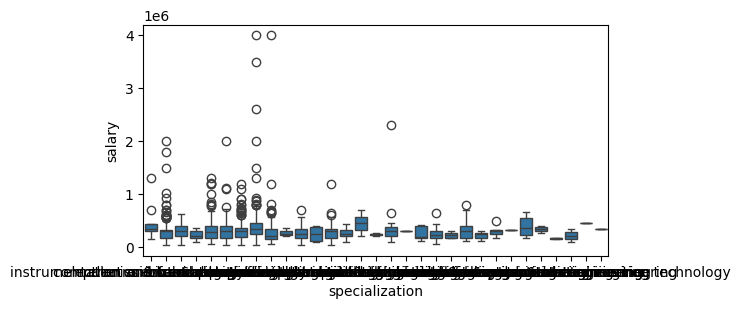

In [80]:
plt.figure(figsize=(6, 3))

sns.boxplot(x='specialization', y='salary', data=df)


plt.show()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2809 entries, 0 to 2997
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2809 non-null   object        
 1   gender                 2809 non-null   object        
 2   dob                    2809 non-null   datetime64[ns]
 3   10percentage           2809 non-null   float64       
 4   12graduation           2809 non-null   int64         
 5   12percentage           2809 non-null   float64       
 6   collegeid              2809 non-null   object        
 7   collegetier            2809 non-null   object        
 8   degree                 2809 non-null   object        
 9   specialization         2809 non-null   object        
 10  collegegpa             2809 non-null   float64       
 11  collegecityid          2809 non-null   object        
 12  collegecitytier        2809 non-null   object        
 13  graduati

In [82]:
df.drop(columns=['id','collegeid','collegecityid'], inplace= True)

In [83]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Identificar las columnas categóricas en el DataFrame
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

# Lista para acumular resultados
resultados = []

# Iterar a través de las columnas categóricas y realizar ANOVA para cada una
for col in columnas_categoricas:
    # Asegurándose de que la columna no es 'salary' para evitar incluirla en el análisis como variable independiente
    if col != 'salary':
        formula = f'salary ~ C({col})'
        modelo = ols(formula, data=df).fit()
        tabla_anova = sm.stats.anova_lm(modelo, typ=2)  # typ=2 para ANOVA de una vía

        # Extraer el F-Value y el P-Value
        f_value = tabla_anova['F'][0]
        p_value = tabla_anova['PR(>F)'][0]

        # Añadir resultado a la lista
        resultados.append({'Variable': col, 'F-Value': f_value, 'P-Value': p_value})

# Convertir la lista de resultados en un DataFrame
resultados_anova = pd.DataFrame(resultados)

# Ordenar los resultados por P-Value para ver las variables más significativas primero
resultados_anova.sort_values(by='P-Value', inplace=True)

# Mostrar los resultados
print(resultados_anova)


          Variable    F-Value       P-Value
1      collegetier  86.461339  2.777811e-20
3   specialization   3.243848  7.508195e-09
0           gender   4.011717  4.528111e-02
2           degree   2.052669  1.285846e-01
4  collegecitytier   0.666910  4.142003e-01


In [84]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_numeric = df.select_dtypes(include=[np.number])

# Reemplazar NaN con la media (u otro método adecuado para tu caso)
df_numeric = df_numeric.apply(lambda x: x.fillna(x.mean()),axis=0)

# Verificar y tratar valores infinitos, si los hay
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan).apply(lambda x: x.fillna(x.mean()),axis=0)

# Añadir una constante al DataFrame
df_numeric_with_const = add_constant(df_numeric)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = df_numeric_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric_with_const.values, i) for i in range(df_numeric_with_const.shape[1])]

print(vif_data)

                 Variable           VIF
0                   const  8.851370e+06
1            10percentage  2.000506e+00
2            12graduation  5.434956e+00
3            12percentage  2.028472e+00
4              collegegpa  1.311404e+00
5          graduationyear  3.544048e+00
6                 english  1.430906e+00
7                 logical  1.594276e+00
8                   quant  1.618783e+00
9                  domain  1.359853e+00
10    computerprogramming  1.910726e+00
11  electronicsandsemicon  1.619033e+00
12        computerscience  1.446403e+00
13         mechanicalengg  1.364408e+00
14         electricalengg  1.123672e+00
15            telecomengg  1.221785e+00
16              civilengg  1.021865e+00
17      conscientiousness  1.551429e+00
18          agreeableness  1.990548e+00
19           extraversion  1.439190e+00
20            nueroticism  1.196030e+00
21  openess_to_experience  1.719157e+00
22                 salary  1.204252e+00
23                    age  4.160274e+00


as previous seen in the correlation heat map, age, 12graduation and graduationyear are highly correlated.

In [85]:
from sklearn.ensemble import RandomForestRegressor

# Suponiendo que df es tu DataFrame y tienes las columnas numéricas identificadas en X, y 'salary' es tu variable de respuesta.
X = df.select_dtypes(include=['float64', 'int64'])
y = df['salary']

# Asegurándonos de que 'salary' no esté incluida en X
X = X.drop(columns=['salary'], errors='ignore')

# Crear y entrenar el modelo RandomForestRegressor
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X, y)

# Obtener la importancia de las características
importancias_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

importancias_rf

,Variable,Importancia
7,quant,0.147378
16,conscientiousness,0.088682
6,logical,0.079462
0,10percentage,0.071156
5,english,0.067692
9,computerprogramming,0.063335
4,graduationyear,0.062111
3,collegegpa,0.061506
2,12percentage,0.052912
17,agreeableness,0.046264


### 3. Explore Target variable

In [26]:
target = 'salary'

In [27]:
df[target]

0       445000
1       110000
2       255000
3       420000
4       200000
         ...  
2993    120000
2994    120000
2995    385000
2996    530000
2997    200000
Name: salary, Length: 2809, dtype: int64

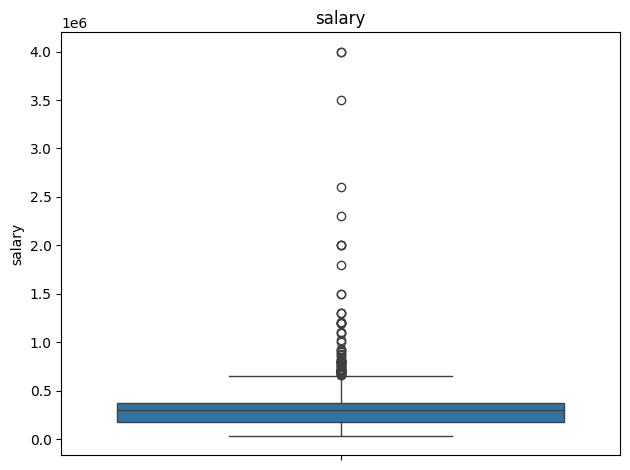

In [28]:
sns.boxplot(y=df[df[target] != -1][target])
plt.title(target)

plt.tight_layout()
plt.show()

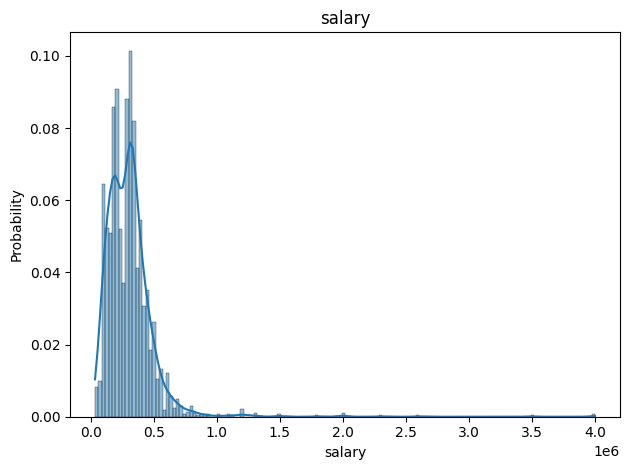

In [29]:
sns.histplot(df[target], kde=True, stat='probability')
plt.title(target)
plt.tight_layout()
plt.show()

In [30]:
df['z_score'] =zscore(df[target])

In [31]:
z_score_treshold = 4

outliers = df[(df['z_score'].abs() > z_score_treshold)].shape[0]

# Mostrando el número de filas que serán eliminadas
print(f"Número de filas que serán eliminadas por superar el umbral de Z-Score ({z_score_treshold}): {outliers}")
df = df[(df['z_score'].abs() <= z_score_treshold)]

Número de filas que serán eliminadas por superar el umbral de Z-Score (4): 20


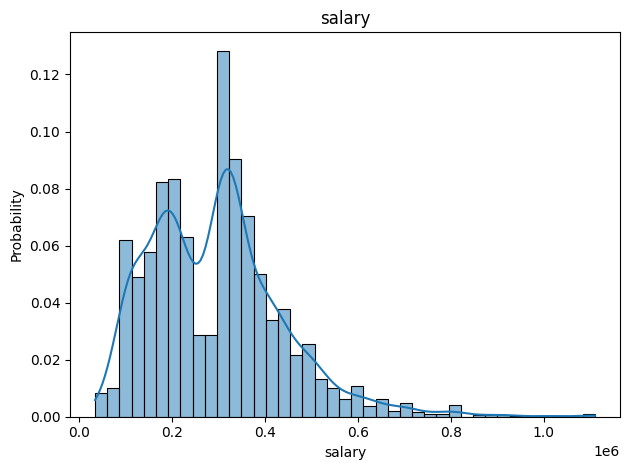

In [32]:
sns.histplot(df[target], kde=True, stat='probability')
plt.title(target)
plt.tight_layout()
plt.show()

### 4. Explore Variables of Interest

### 5. Prepare Data

intital preprocesing

In [51]:
def clean_and_preprocess_df(df_treated):
    # Hacer una copia para evitar modificar el DataFrame original
    df_processing = df_treated.copy()

    # Convertir columnas específicas a tipo string
    df_processing[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']] = df_processing[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']].astype(str)

    # Convertir 'dob' a datetime y calcular 'age'
    df_processing['dob'] = pd.to_datetime(df_processing['dob'])
    df_processing['age'] = df_processing['dob'].apply(
        lambda x: datetime.datetime.now().year - x.year - ((datetime.datetime.now().month, datetime.datetime.now().day) < (x.month, x.day))
    )


    # Aplicar filtros, excluyendo 'salary' de cualquier transformación
    df_processing = df_processing[(df_processing['collegegpa'] >= 20) & (df_processing['domain'] >= 0)]

    #Filtering outliers in the target variable
    target = 'salary'
    df_processing['z_score'] =zscore(df_processing[target])

    df_processing = df_processing[(df_processing['z_score'].abs() <= 4)].drop('z_score', axis=1)


    # Eliminar columnas que ya no se necesitan, excluyendo 'salary'
    df_processing.drop(columns=['id', 'dob', 'collegeid', 'collegecityid', '12graduation', 'graduationyear','collegetier'], inplace=True)

    # Escalado Min-Max para las variables numéricas, excluyendo 'salary'
    numeric_cols = df_processing.select_dtypes(include=['float64', 'int64']).columns.drop('salary')
    scaler = MinMaxScaler()
    df_processing[numeric_cols] = scaler.fit_transform(df_processing[numeric_cols])

    # Codificación one-hot con pd.get_dummies, asegurándose de que el resultado sea de tipo entero
    dummies_df = pd.get_dummies(df_processing[['gender', 'specialization', 'collegecitytier']], drop_first=True).astype(int)
    df_processing = pd.concat([df_processing, dummies_df], axis=1)
    df_processing.drop(['gender', 'specialization', 'collegecitytier'], axis=1, inplace=True)

    # Mapeo manual para codificación ordinal de 'degree'
    degree_mapping = {'B.Tech/B.E.': 0, 'M.Tech./M.E.': 1, 'MCA': 2}
    df_processing['degree'] = df_processing['degree'].map(degree_mapping)

    df_processing.replace(-1, 0)

    return df_processing


In [52]:
def filter_and_add_columns(df, columns_list):
    # Crear una copia del DataFrame para no modificar el original
    df_filtered = df.copy()


    # Identificar las columnas que están en la lista pero no en el DataFrame
    missing_columns = [col for col in columns_list if col not in df_filtered.columns]

    # Agregar las columnas faltantes al DataFrame, llenándolas con 0
    for col in missing_columns:
        df_filtered[col] = 0

    # Filtrar el DataFrame para mantener solo las columnas que están en la lista
    df_filtered = df_filtered[[col for col in df_filtered.columns if col in columns_list]]
    # Asegurarse de que el orden de las columnas en el DataFrame resultante sea el mismo que en columns_list
    df_filtered = df_filtered[columns_list]

    return df_filtered

### exp

In [53]:
df_model = clean_and_preprocess_df(df_train)

y = df_model['salary']  # Asegúrate de que 'Salary' es el nombre correcto de tu variable objetivo
X = df_model.drop('salary', axis=1)  # Eliminar la variable objetivo del conjunto de características


# Entrenar el modelo
model = LinearRegression()
model.fit(X, y)

# Evaluar el modelo
y_pred = model.predict(X)

mse_train = mean_squared_error(y, y_pred, squared=False)

columns= X.columns

In [54]:

#Validation
df_model_val = clean_and_preprocess_df(df_val)
y = df_model_val['salary']
X = filter_and_add_columns(df_model_val.drop('salary', axis=1),columns)
y_pred = model.predict(X)

mse_val = mean_squared_error(y, y_pred, squared=False)

#TEST
df_model_test = clean_and_preprocess_df(df_test)
y = df_model_test['salary']
X = filter_and_add_columns(df_model_test.drop('salary', axis=1),columns)
y_pred = model.predict(X)

mse_test = mean_squared_error(y, y_pred, squared=False)


print('Base_line model: 212484.24')
print(f'MSE TRAIN: {mse_train}')
print(f'MSE VALIDATION: {mse_val}')
print(f'MSE TEST: {mse_test}')


Base_line model: 212484.24
MSE TRAIN: 122031.9625621011
MSE VALIDATION: 123912.86992821784
MSE TEST: 122990.19941870184


Base_line model: 212484.24
MSE TRAIN: 122031.9625621011
MSE VALIDATION: 123912.86992821784
MSE TEST: 122990.19941870184

### 6. Split Dataset

In [229]:
X_train = df_model_train.drop('salary', axis=1)
X_val = df_model_val.drop('salary', axis=1)
X_test = df_model_test.drop('salary', axis=1)

y_train = df_model_train[target]
y_val = df_model_val[target]
y_test = df_model_test[target]

### 7. Baseline Model

In [230]:
y_mean = y_train.mean()
y_central = np.full(y_train.shape, y_mean)
y_central_val = np.full(y_val.shape, y_mean)
y_central_test = np.full(y_test.shape, y_mean)

In [231]:
train_perf = mean_squared_error(y_train, y_central, squared=False)
valid_perf = mean_squared_error(y_val, y_central_val, squared=False)
test_perf = mean_squared_error(y_test, y_central_test, squared=False)

print('train_perf: ', train_perf)
print('valid_perf: ', valid_perf)
print('test_perf: ', test_perf)


train_perf:  212484.24291174178
valid_perf:  278332.10677755944
test_perf:  171264.01159276426


### 8. Train Machine Learning Model

In [ ]:
model =

### 9. Assess Model Performance

In [ ]:
model_train_perf =
model_valid_perf =
model_test_perf =

### 10. Dudas

1) en columnas de examen que tienen valores de -1, como la de los examenes, como se pueden tratar esos valores a la hora del modelo?

2) Como se puede definir quitar columnas con muchos valores faltantes?, ejemplo: `civilengg` con mas de 99% de valores en -1

3) En una columna como puedo saber si puedo eliminar una categoria por tener muy pocos valores, esto como afecta el modelo? ejemplo:`degree` tiene casi todos los valores en B.Tech y casi ningun valor de M. sc (Tech), es posible eliminar la categoria de M.sc(tech) o es mejor dejarla?

4) Como lidiar con los -1 en un calculo de correlacion, ejemplo, los dos mapas decorrelacion